<a href="https://colab.research.google.com/github/MargaritaFateeva/PythonSeminars/blob/main/DZ04_python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Урок 4. Визуальный анализ данных
##Условие 1: Задача 1
###Постройте график
###Назовите график
###Сделайте именование оси x и оси y
###Сделайте выводы
###1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

###1.2 Изучите стоимости недвижимости

In [ ]:
df.groupby("condition").agg({"price": ["min", "mean", "max"]})

price                          
                min           mean        max
condition                                    
1           78000.0  334431.666667  1500000.0
2           80000.0  327287.145349  2555000.0
3           75000.0  542012.578148  7062500.0
4           89000.0  521200.390033  7700000.0
5          110000.0  612418.089359  3650000.0

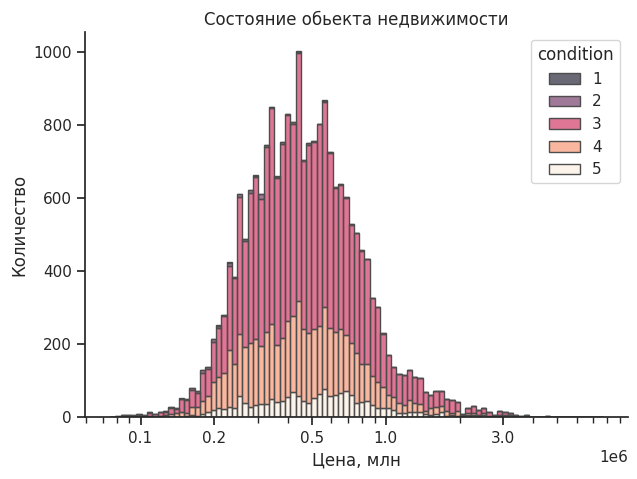

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
plt.xlabel('Цена, млн')
plt.ylabel('Количество')
plt.title('Состояние обьекта недвижимости')
sns.histplot(
    df,
    x="price", hue="condition",
    multiple="stack",
    palette="rocket",
    edgecolor=".3",
    linewidth=1,
    log_scale=True,
    alpha=0.6
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([100000, 200000, 500000, 1000000, 3000000])

Гистограмма показывает распределение количества домов по цене в зависимости от состояния дома.
По мере роста уровня состояния дома распределение сдвигается вправо - дома с состоянием "3" по мимнимальной цене дешевле чем минимальная цена дома с состоянием "5".
Количество домов в среднем состоянии значительно больше чем категорий 4 и 5.
Прямой зависимости цены от состояния не наблюдается, тк распределение количсва домов примерно в одних значениях по цене - один из факторов влиящих на цену. Отличаются только количеством - домов в состоянии 4 и 5 меньше, поэтому распределения менее выпуклы.

##для графика ниже
Явную прямую зависимость цены, в отличие от параметра состояние, имеет параметр класс жилья. Здесь график распределения количества домов в зависимотси от класса сдвигается вправо по мемре улучшения класса жилья.
Например мимнимальная цена для класса 10 и 11 различна на 300 000. Для жилья класса ниже 6 минимальная цена примерно одинакова.
Жилье стоимостью 1 000 000 и выше не встречается классов ниже 7 и их количество резко сокращается отностильно всего количества домов.
Наибольшее количество домов имееют класс 7

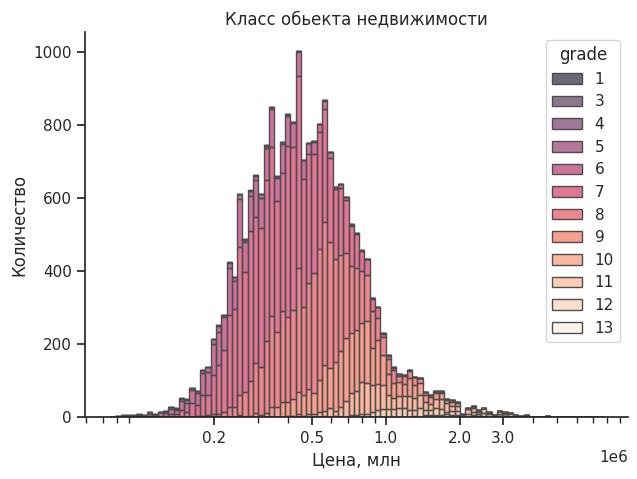

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
plt.xlabel('Цена, млн')
plt.ylabel('Количество')
plt.title('Класс обьекта недвижимости')
sns.histplot(
    df,
    x="price", hue="grade",
    multiple="stack",
    palette="rocket",
    edgecolor=".3",
    linewidth=1,
    log_scale=True,
    alpha=0.6
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([200000, 500000, 1000000, 2000000, 3000000])

###1.3 Изучите распределение квадратуры жилой

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Text(0, 0.5, 'Количество')

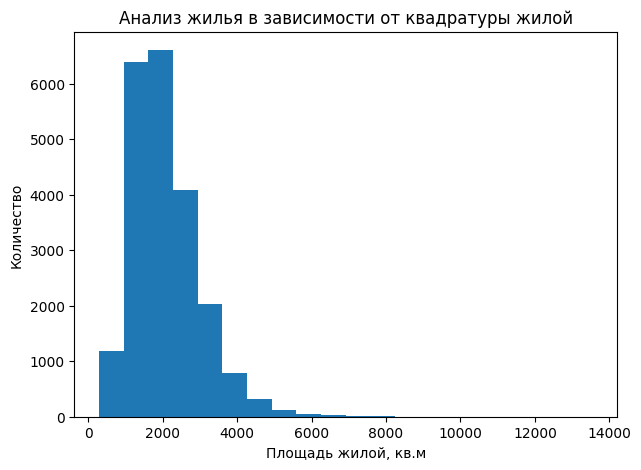

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(df['sqft_living'], bins=20)
plt.title('Анализ жилья в зависимости от квадратуры жилой')
plt.xlabel('Площадь жилой, кв.м')
plt.ylabel('Количество')

###1.4 Изучите распределение года постройки

Text(0, 0.5, 'Количество')

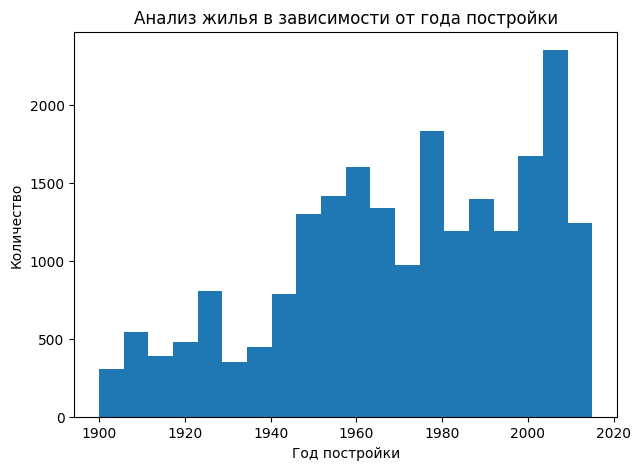

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(df['yr_built'], bins=20)
plt.title('Анализ жилья в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество')

##Условие 2: 2 задача
###Постройте график
###Сделайте выводы
###2.1 Изучите распределение домов от наличия вида на набережную

In [ ]:
wf=df['waterfront'].value_counts()

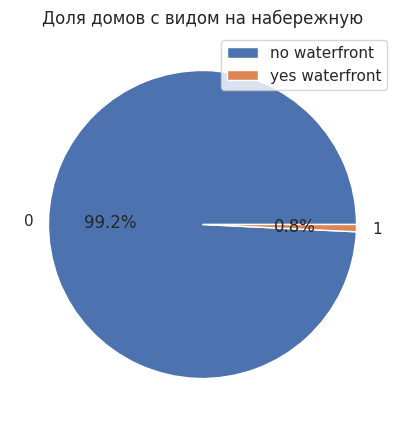

In [ ]:
plt.figure(figsize=(7, 5))

plt.pie(wf.values, autopct='%1.1f%%', labels=wf.index)

plt.title('Доля домов с видом на набережную')
plt.legend(['no waterfront', 'yes waterfront']);

###2.2 Изучите распределение этажей домов

In [3]:
df["floors"].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [23]:
data1 = df['price'][df['floors'] == 1.0]
data2 = df['price'][df['floors'] == 1.5]
data3 = df['price'][df['floors'] == 2.0]
data4 = df['price'][df['floors'] == 2.5]
data5 = df['price'][df['floors'] == 3.0]
data6 = df['price'][df['floors'] == 3.5]

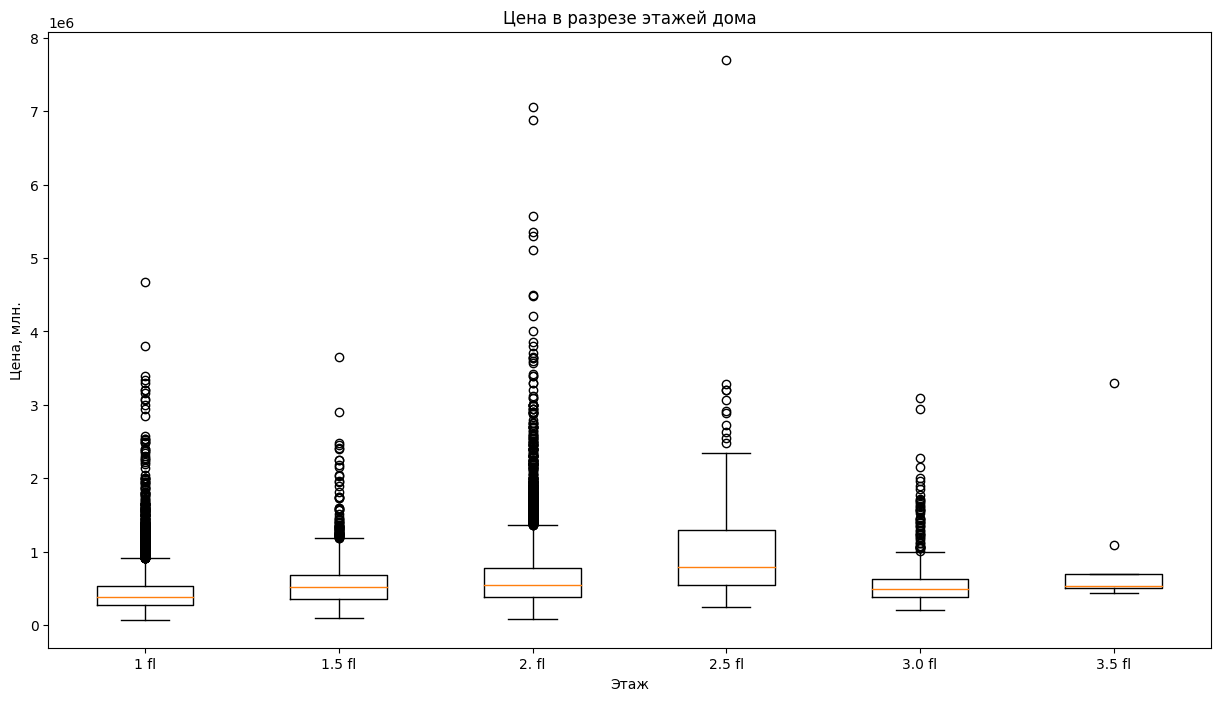

In [24]:
plt.figure(figsize=(15, 8))
plt.boxplot([data1, data2, data3, data4, data5, data6])
plt.title('Цена в разрезе этажей дома')
plt.xlabel('Этаж')
plt.ylabel('Цена, млн.')
plt.xticks([1, 2, 3, 4, 5, 6], ['1 fl', '1.5 fl', '2. fl', '2.5 fl', '3.0 fl', '3.5 fl']);

###2.3 Изучите распределение состояния домов

In [8]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [20]:
con=df["condition"].replace(1, 'very bad').replace(2, 'medium').replace(3, 'good').replace(4, 'very good').replace(5, 'exellence')

Text(0, 0.5, 'Состояние дома')

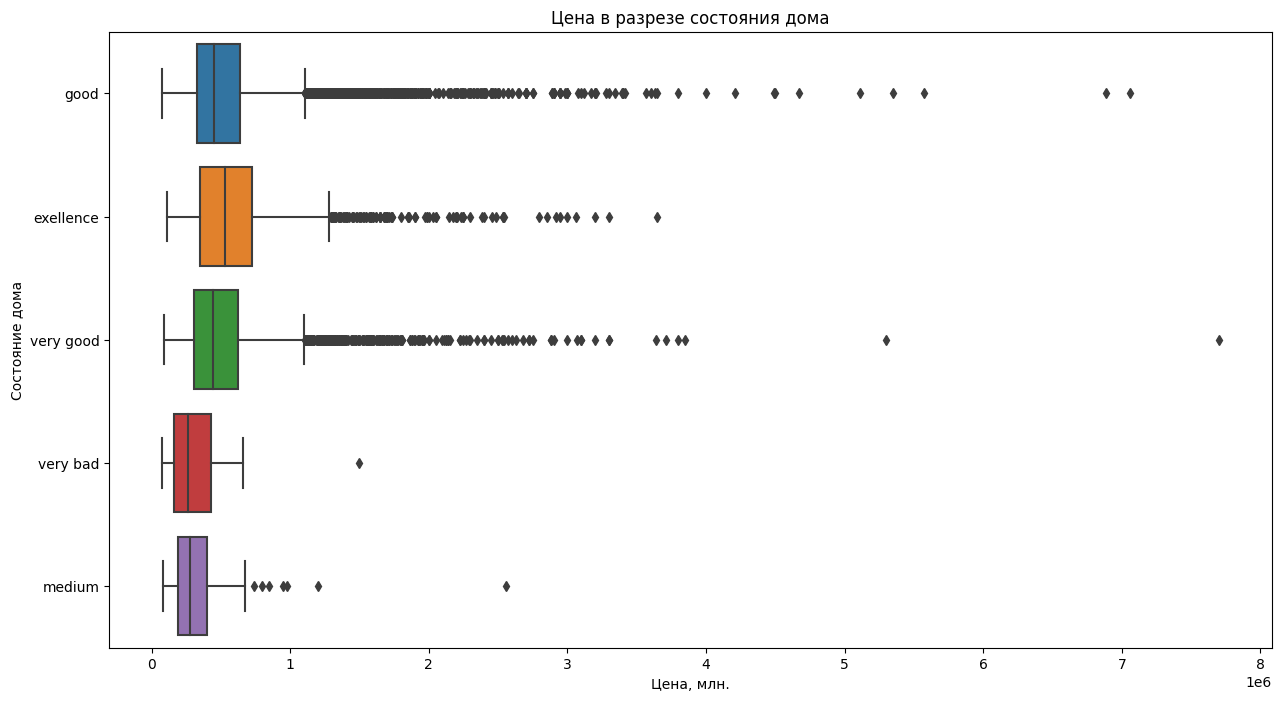

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(y=con, x=df["price"], whis=1.5)
plt.title('Цена в разрезе состояния дома')
plt.xlabel('Цена, млн.')
plt.ylabel('Состояние дома')

####Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет".
####"Зачет" ставится, если слушатель успешно выполнил 3 или 2 критерия.
####"Незачет" ставится, если слушатель успешно выполнил 1 или меньше критериев.

####Критерии оценивания:
####- слушатель верно подгрузил данные в библиотеку
####- слушатель сформировал корректный график по данным
####- слушатель проанализировал данные и сделал корректный вывод